## Problem statement

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Second-Phase-Evaluation-Projects--1-\Temperature Forecast Project using ML\temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


#### Columns

In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



#### Analising basic metrics

In [4]:
df.shape

(7752, 25)

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot: >

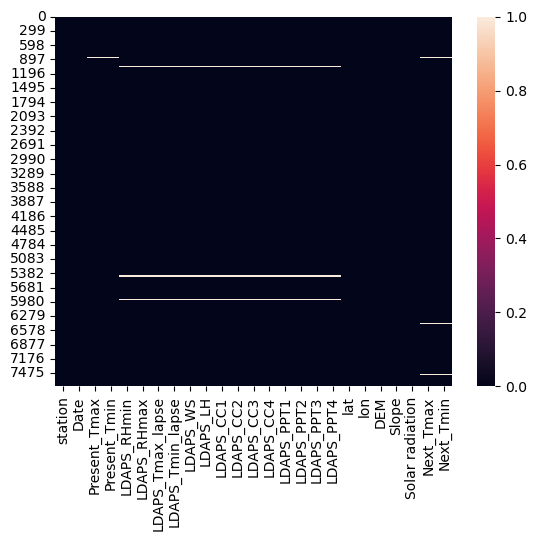

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


##### Findings

- There are Many  Null Values
- All columns except Date are Float Data types
- we can observe that few rows contain many null columns so we can remove those nulls

In [8]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

- There are No Categorical columns

In [9]:
df.shape

(7752, 25)

In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [11]:
num_col = df.columns.to_list()
num_col.remove('Date')

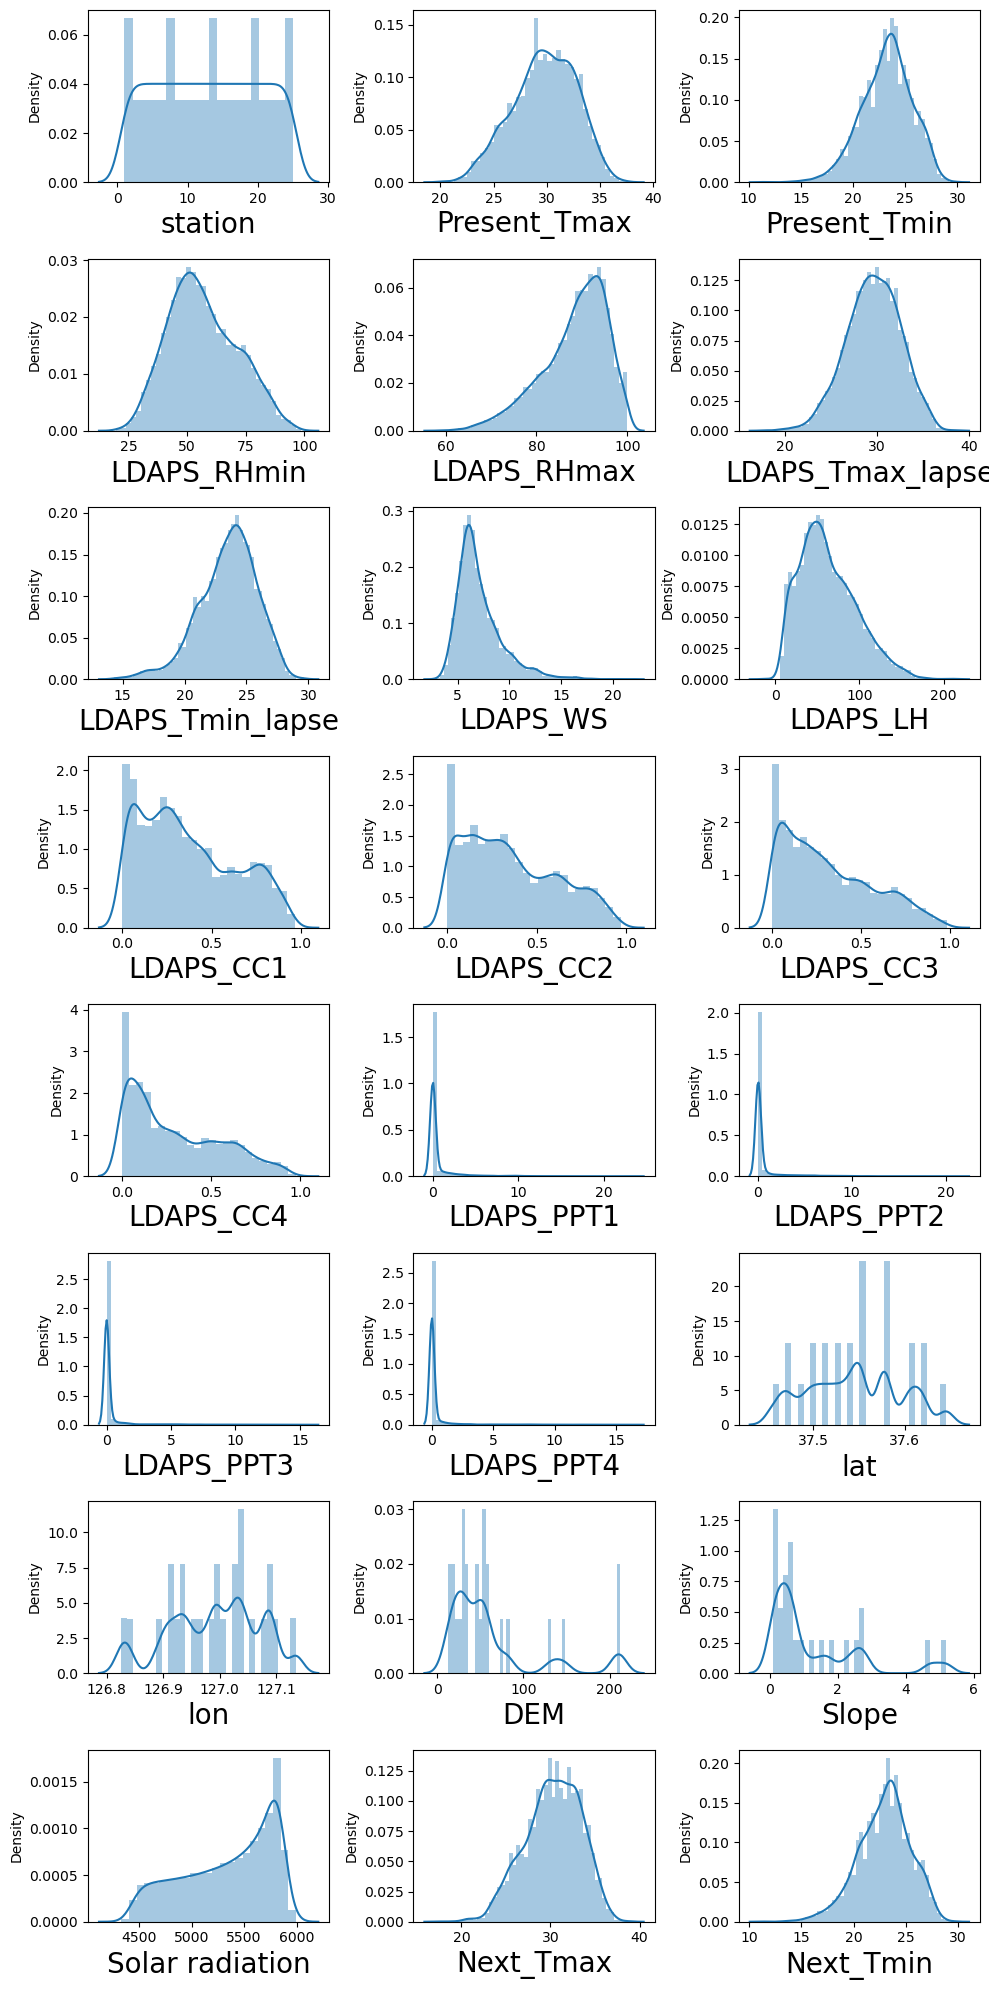

In [12]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(8,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are skewed (Not Normally Distrubuted)
- There is Huge difference between Max and 75% data(Outliers) in  all LADPS_PPT columns,LDAPS_WS column,LDAPS_LH column,DEM	column,Slope column etc
	

#### Missing value treatment

In [13]:
# dropping all null values
df=df.dropna()

#### Data Visualization

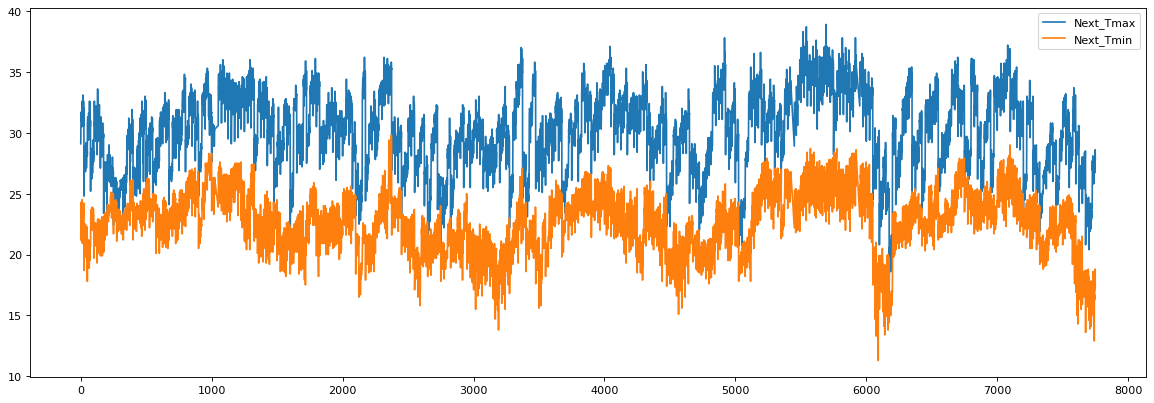

In [14]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

- we can observe that as expected our both target variable are Highly Co-Related

In [15]:
# converting Date to datetyme format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)

month_df = df.groupby('Month')
year_df = df.groupby('Year')

(28.0, 33.0)

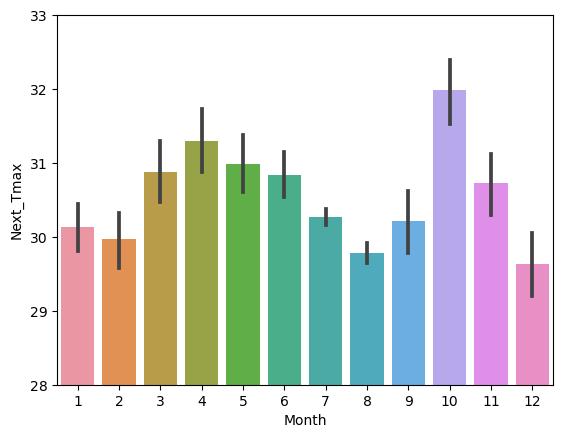

In [16]:
ax = sns.barplot(x='Month',y = 'Next_Tmax',data = df)
ax.set_ylim(28, 33)  # Keep the existing upper limit


We can observe taht temperature is minimum in Month of August and maximun in month of october

(29.0, 32.0)

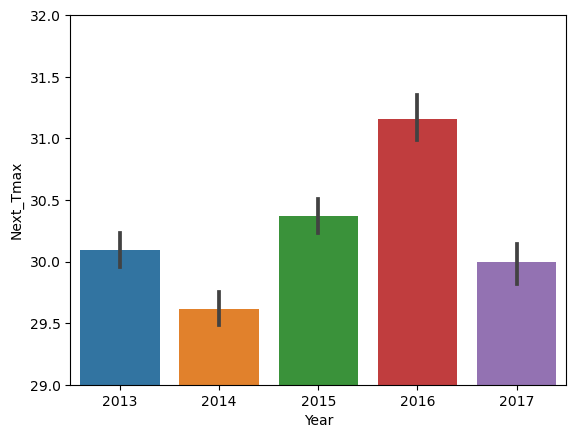

In [17]:
ax = sns.barplot(x='Year',y = 'Next_Tmax',data = df)
ax.set_ylim(29, 32)  # Keep the existing upper limit


we can observe that Temperature is minimum in year 2014 and maximum in year 2016

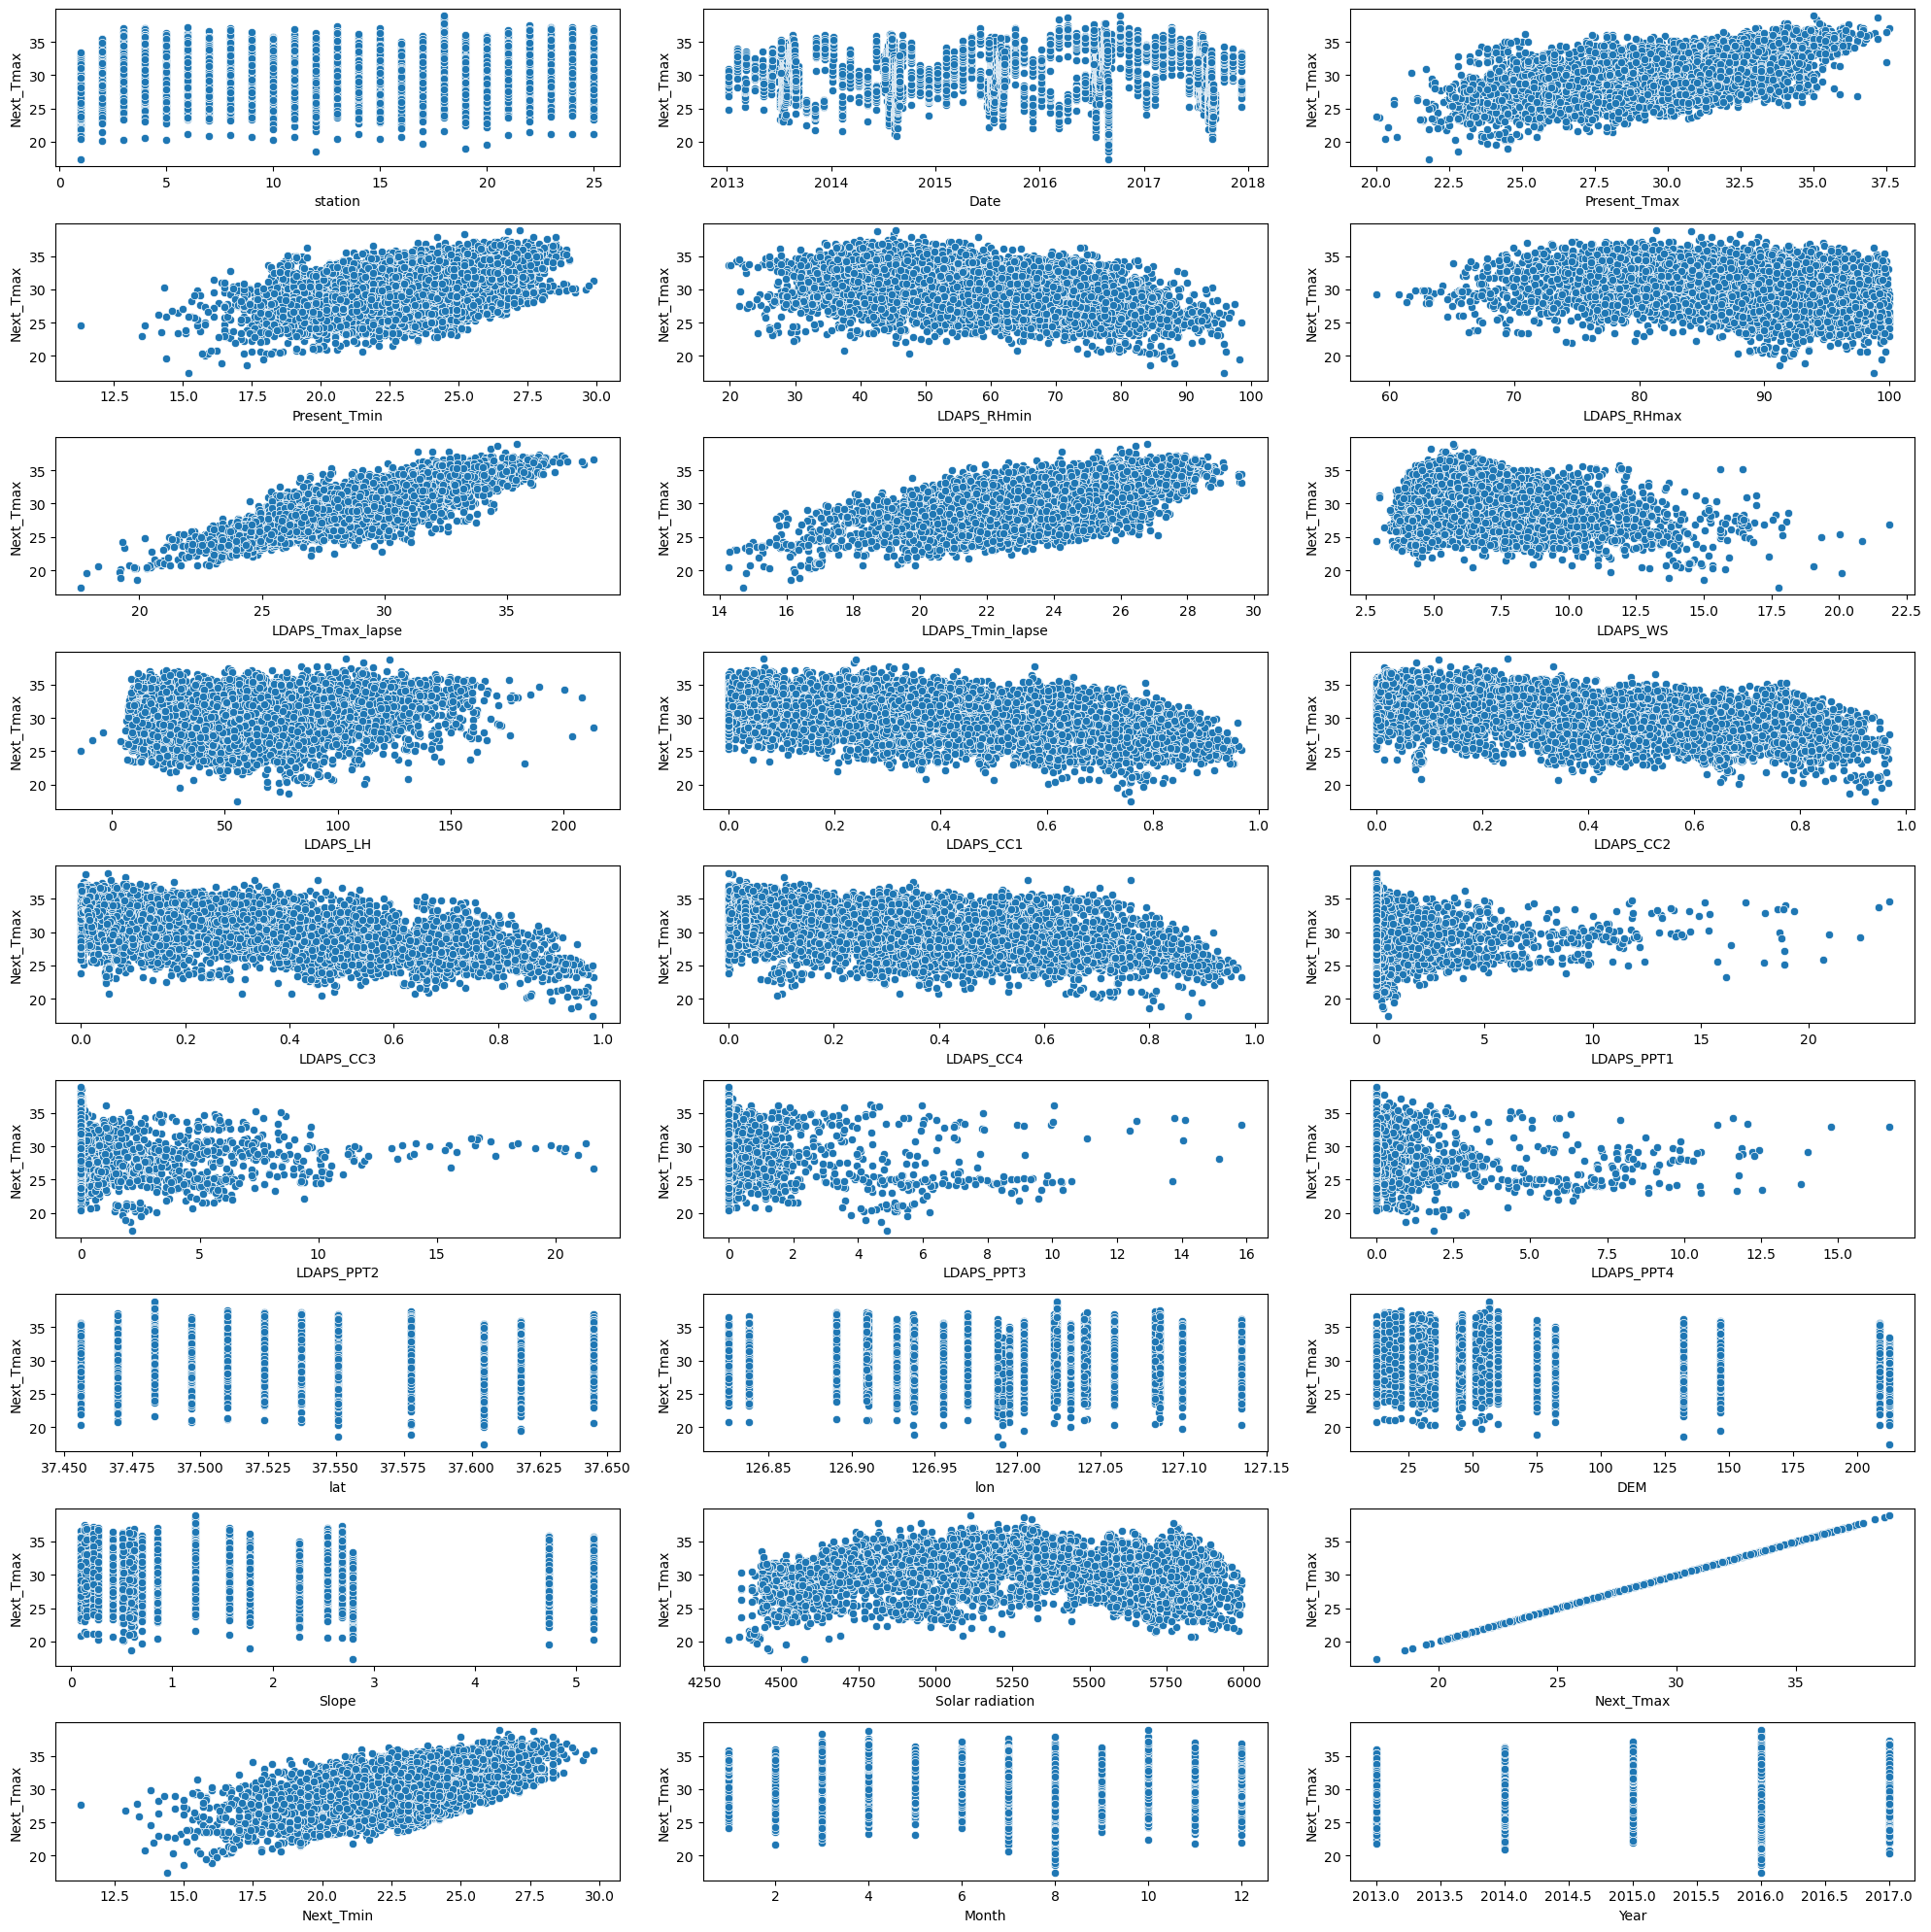

In [18]:
plt.figure(figsize=(20,20))
pn = 1
for i in df.columns:
    if pn <= 27:
        sns.scatterplot(x=i,y="Next_Tmax",data=df,ax=plt.subplot(9,3,pn))
        plt.xlabel(i)
        pn+=1

plt.tight_layout()        

##### Findings

- Present_Tmax, Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse and Next_Tmin are  positively corelated with Next_Tmax

- LDAPS_RHmin,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 are slightly Negitively corelated with Next_Tmax


In [19]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month',
       'Year'],
      dtype='object')

<AxesSubplot: >

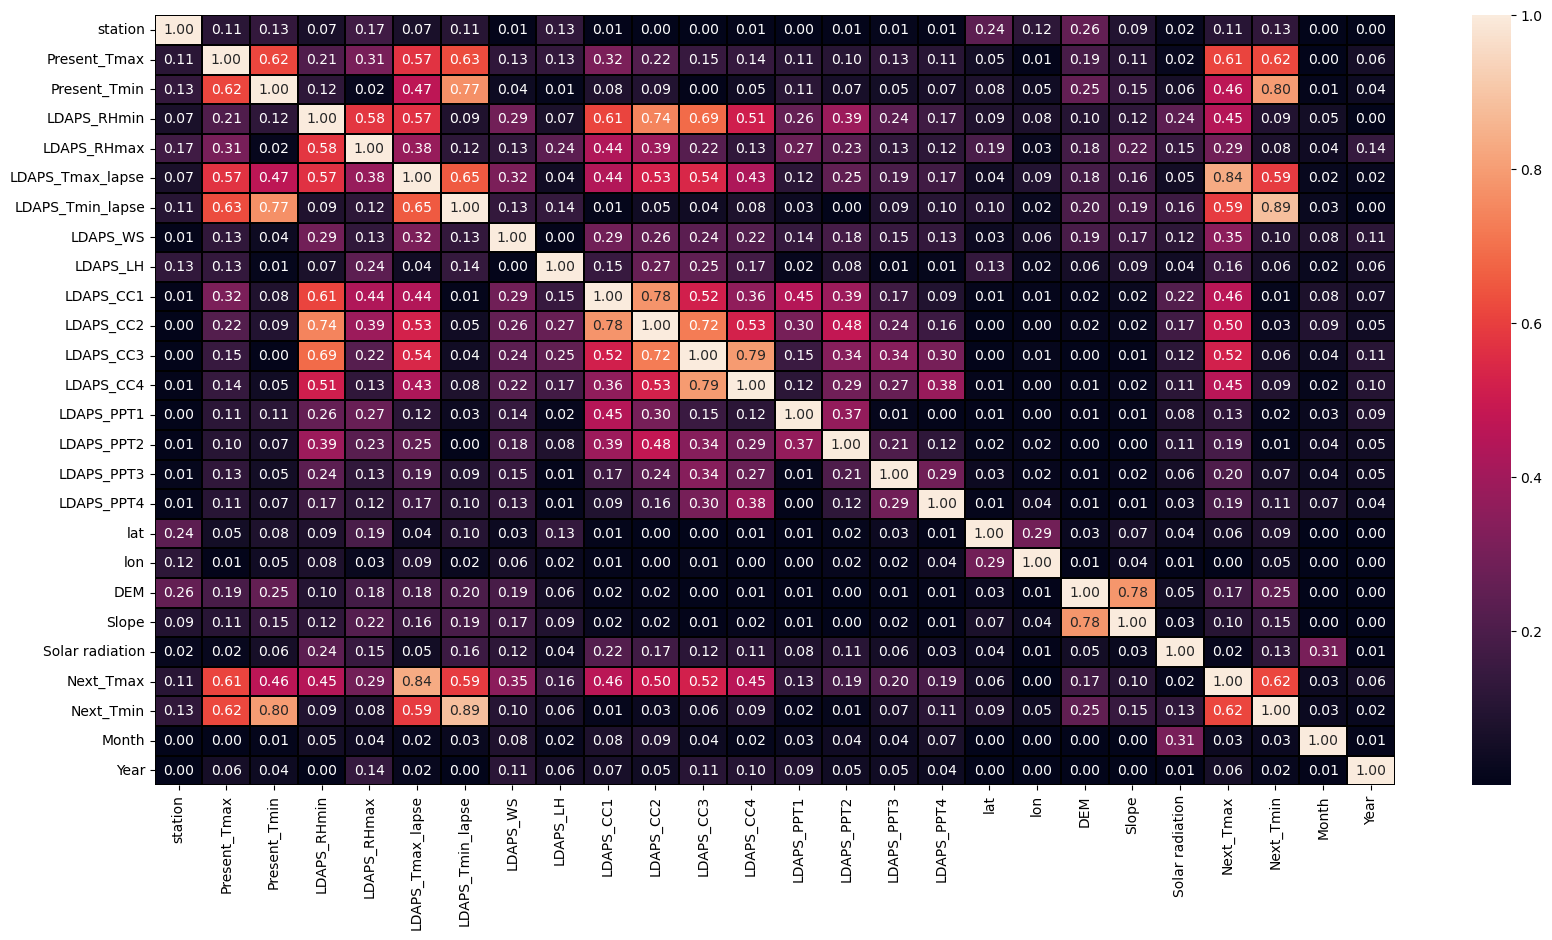

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

we can observe that date,Month And Year are not contributing Much to the Target Columns so we can remove them

In [21]:
df.drop(columns=['Date','Year','Month','lat','lon'],inplace=True)

### Outliers

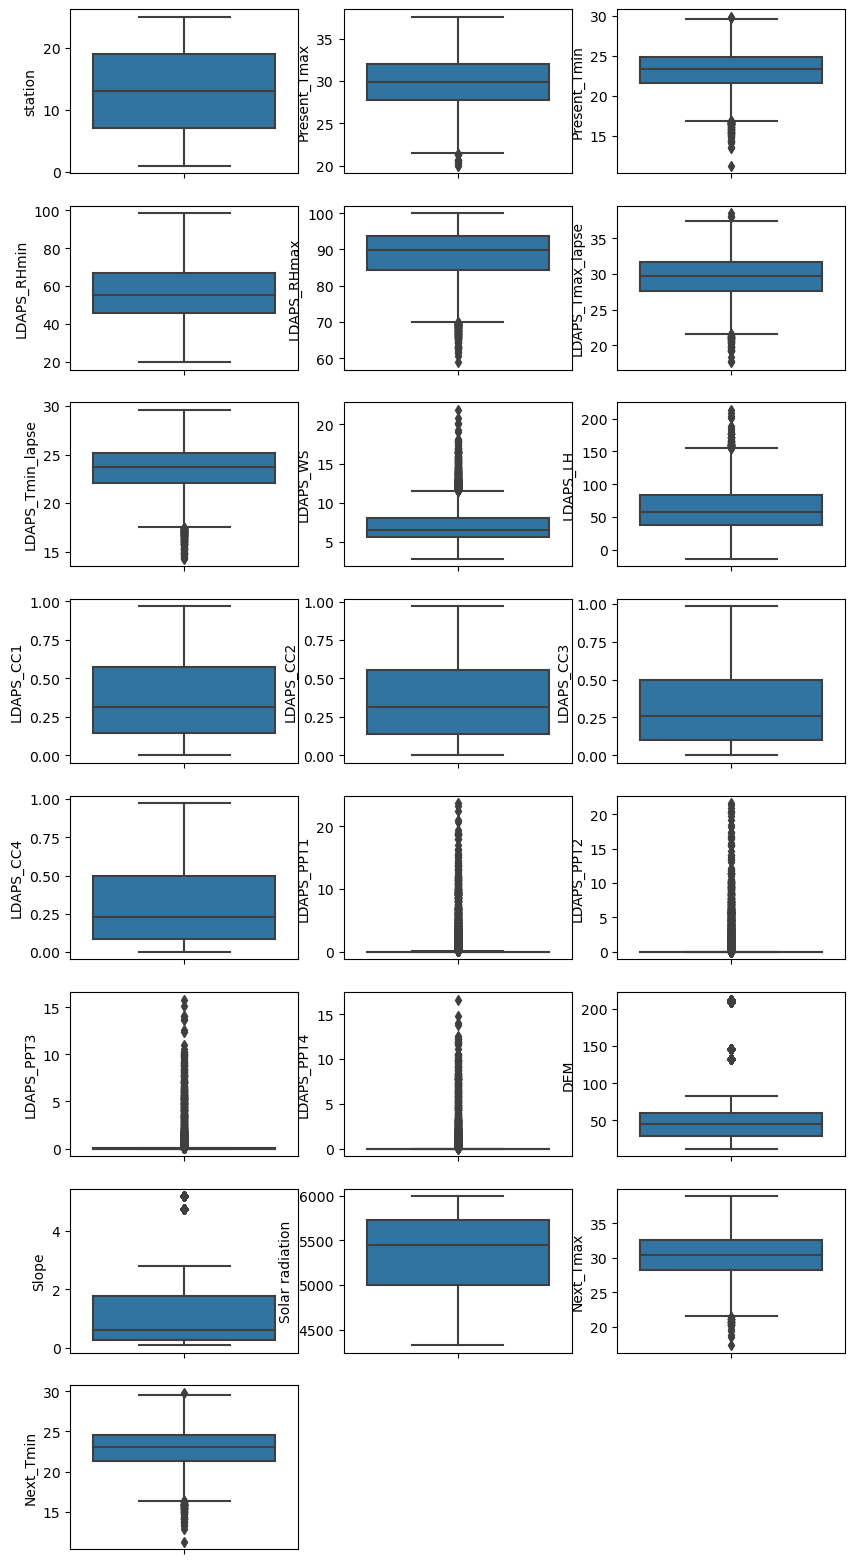

In [22]:
plt.figure(figsize=(10,20))
pn = 1
for i in df.columns:
    sns.boxplot(y=df[i],ax=plt.subplot(8,3,pn))
    pn+=1

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [23]:
prev = df.shape

In [24]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df.drop(columns=['Next_Tmax','Next_Tmin'])))
z[z>3].count()

station               0
Present_Tmax          7
Present_Tmin         33
LDAPS_RHmin           0
LDAPS_RHmax          48
LDAPS_Tmax_lapse     24
LDAPS_Tmin_lapse     56
LDAPS_WS            121
LDAPS_LH             27
LDAPS_CC1             0
LDAPS_CC2             0
LDAPS_CC3             0
LDAPS_CC4             0
LDAPS_PPT1          192
LDAPS_PPT2          203
LDAPS_PPT3          192
LDAPS_PPT4          160
DEM                   0
Slope                 0
Solar radiation       0
dtype: int64

In [25]:
df1 = df[z<3]
df1['Next_Tmax'] = df['Next_Tmax']
df1['Next_Tmin']= df['Next_Tmin']

In [26]:
df1 = df1.dropna()
df1.reset_index(drop=True,inplace=True)
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6747,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414,27.6,17.7
6748,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711,28.0,17.1
6749,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965,28.3,18.1
6750,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535,28.6,18.8


In [27]:
df1.shape

(6752, 22)

In [28]:
print('Data Loss % = ',np.round((prev[0]-df1.shape[0])*100/prev[0],2),"%")

Data Loss % =  11.02 %


Eventhough our data loss is 11.02% we can continue

### Skeweness

In [29]:
df.skew().abs()

station             0.004178
Present_Tmax        0.257069
Present_Tmin        0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax         0.845264
LDAPS_Tmax_lapse    0.222349
LDAPS_Tmin_lapse    0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
DEM                 1.721617
Slope               1.559050
Solar radiation     0.524325
Next_Tmax           0.334842
Next_Tmin           0.393662
dtype: float64

In [30]:
# seperating skew columns
skew=[df.columns.to_list()[i] for i in np.where(df.skew().abs() > 0.5)[0].tolist()]

In [31]:
skew

['LDAPS_RHmax',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'DEM',
 'Slope',
 'Solar radiation']

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[skew] = pt.fit_transform(df[skew])
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,2.885352e+09,28.074101,3471.996474,0.921167,17.844451,0.233947,0.203896,1.365745e-01,0.112012,-0.0,-0.0,-0.0,-0.0,2.875236,0.723960,5.896553e+17,29.1,21.2
1,2.0,31.9,21.6,52.263397,2.803301e+09,29.850689,3920.999802,0.896080,14.917398,0.225508,0.251771,1.349656e-01,0.109665,-0.0,-0.0,-0.0,-0.0,2.411823,0.337505,5.325810e+17,30.5,22.5
2,3.0,31.6,23.3,48.690479,1.899498e+09,30.091292,4166.917660,0.906926,8.275215,0.209344,0.257469,1.655872e-01,0.120091,-0.0,-0.0,-0.0,-0.0,2.302265,0.209432,5.300337e+17,31.1,23.9
3,4.0,32.0,23.4,58.239788,3.868942e+09,29.704629,3607.603317,0.894992,17.251186,0.216372,0.226002,1.361899e-01,0.114429,-0.0,-0.0,-0.0,-0.0,2.419352,0.706000,5.271294e+17,31.7,24.3
4,5.0,31.4,21.9,56.174095,2.732764e+09,29.113934,3676.985208,0.897188,23.329816,0.151407,0.249995,1.486267e-01,0.139364,-0.0,-0.0,-0.0,-0.0,2.321578,0.333780,5.282680e+17,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,1.324644e+09,27.812697,1844.480841,0.916921,4.956764,0.052902,0.030169,-0.000000e+00,0.004356,-0.0,-0.0,-0.0,-0.0,2.209268,0.361544,1.386395e+17,27.6,17.7
7746,22.0,22.5,17.4,30.094858,1.866893e+09,26.704905,1712.192020,0.898029,19.770791,0.066461,0.024518,5.849996e-07,0.017287,-0.0,-0.0,-0.0,-0.0,2.135162,0.117319,1.364913e+17,28.0,17.1
7747,23.0,23.3,17.1,26.741310,1.378168e+09,26.352081,1978.555384,0.907170,18.251537,0.030034,0.081035,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0,-0.0,1.986109,0.134204,1.367182e+17,28.3,18.1
7748,24.0,23.3,17.7,24.040634,1.243093e+09,27.010193,1966.345514,0.915689,14.063523,0.035874,0.074962,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0,-0.0,2.032351,0.181321,1.359772e+17,28.6,18.8


## M.L

In [33]:
x = df.drop(columns=['Next_Tmax','Next_Tmin'])
y1=df['Next_Tmax']
y2=df['Next_Tmin']

In [34]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,2.885352e+09,28.074101,3471.996474,0.921167,17.844451,0.233947,0.203896,1.365745e-01,0.112012,-0.0,-0.0,-0.0,-0.0,2.875236,0.723960,5.896553e+17
1,2.0,31.9,21.6,52.263397,2.803301e+09,29.850689,3920.999802,0.896080,14.917398,0.225508,0.251771,1.349656e-01,0.109665,-0.0,-0.0,-0.0,-0.0,2.411823,0.337505,5.325810e+17
2,3.0,31.6,23.3,48.690479,1.899498e+09,30.091292,4166.917660,0.906926,8.275215,0.209344,0.257469,1.655872e-01,0.120091,-0.0,-0.0,-0.0,-0.0,2.302265,0.209432,5.300337e+17
3,4.0,32.0,23.4,58.239788,3.868942e+09,29.704629,3607.603317,0.894992,17.251186,0.216372,0.226002,1.361899e-01,0.114429,-0.0,-0.0,-0.0,-0.0,2.419352,0.706000,5.271294e+17
4,5.0,31.4,21.9,56.174095,2.732764e+09,29.113934,3676.985208,0.897188,23.329816,0.151407,0.249995,1.486267e-01,0.139364,-0.0,-0.0,-0.0,-0.0,2.321578,0.333780,5.282680e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,1.324644e+09,27.812697,1844.480841,0.916921,4.956764,0.052902,0.030169,-0.000000e+00,0.004356,-0.0,-0.0,-0.0,-0.0,2.209268,0.361544,1.386395e+17
7746,22.0,22.5,17.4,30.094858,1.866893e+09,26.704905,1712.192020,0.898029,19.770791,0.066461,0.024518,5.849996e-07,0.017287,-0.0,-0.0,-0.0,-0.0,2.135162,0.117319,1.364913e+17
7747,23.0,23.3,17.1,26.741310,1.378168e+09,26.352081,1978.555384,0.907170,18.251537,0.030034,0.081035,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0,-0.0,1.986109,0.134204,1.367182e+17
7748,24.0,23.3,17.7,24.040634,1.243093e+09,27.010193,1966.345514,0.915689,14.063523,0.035874,0.074962,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0,-0.0,2.032351,0.181321,1.359772e+17


In [35]:
y1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [36]:
y2

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

### Standerd Scaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,-1.664607,-0.353318,-0.748029,0.104660,0.271501,-0.525269,-0.311364,0.097802,0.318528,-0.513123,-0.587938,-0.533720,-0.577558,-0.560421,-0.521172,-0.4944,-0.447011,1.833902,1.311979,1.852498
1,-1.526052,0.725138,-0.664721,-0.305052,0.184890,0.078334,0.143619,-0.619344,-0.201095,-0.545304,-0.402304,-0.546143,-0.596343,-0.560421,-0.521172,-0.4944,-0.447011,0.055065,-0.387168,1.398583
2,-1.387498,0.624033,0.043400,-0.549344,-0.769141,0.160080,0.392812,-0.309297,-1.380242,-0.606944,-0.380211,-0.309696,-0.512901,-0.560421,-0.521172,-0.4944,-0.447011,-0.365481,-0.950272,1.378325
3,-1.248943,0.758840,0.085054,0.103573,1.309753,0.028710,-0.173951,-0.650457,0.213209,-0.580143,-0.502221,-0.536690,-0.558214,-0.560421,-0.521172,-0.4944,-0.447011,0.083964,1.233016,1.355226
4,-1.110389,0.556630,-0.539758,-0.037665,0.110434,-0.171981,-0.103645,-0.587672,1.292312,-0.827872,-0.409191,-0.440658,-0.358647,-0.560421,-0.521172,-0.4944,-0.447011,-0.291349,-0.403544,1.364282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,1.106481,-2.240616,-2.247578,-2.190405,-1.375942,-0.614083,-1.960554,-0.023579,-1.969347,-1.203497,-1.261546,-1.588290,-1.439171,-0.560421,-0.521172,-0.4944,-0.447011,-0.722455,-0.281473,-1.734456
7584,1.245036,-2.442826,-2.414195,-1.820788,-0.803558,-0.990460,-2.094605,-0.563635,0.660500,-1.151793,-1.283455,-1.588285,-1.335673,-0.560421,-0.521172,-0.4944,-0.447011,-1.006916,-1.355268,-1.751541
7585,1.383590,-2.173212,-2.539157,-2.050081,-1.319444,-1.110333,-1.824694,-0.302325,0.390795,-1.290699,-1.064318,-1.588290,-1.474031,-0.560421,-0.521172,-0.4944,-0.447011,-1.579065,-1.281031,-1.749736
7586,1.522145,-2.173212,-2.289232,-2.234735,-1.462026,-0.886737,-1.837066,-0.058794,-0.352678,-1.268430,-1.087864,-1.588290,-1.474031,-0.560421,-0.521172,-0.4944,-0.447011,-1.401562,-1.073867,-1.755630


### Train test Split

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [39]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y1,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
14,41.0,77.175939,77.498274
34,123.0,77.178749,77.496970
348,996.0,77.190788,77.496816
292,837.0,77.189996,77.496639
289,831.0,77.188366,77.494309
...,...,...,...
62,209.0,77.427851,76.505466
107,347.0,77.432207,76.502689
63,211.0,77.433584,76.502625
331,949.0,77.436371,76.502394


- Therefore best random state is 41

In [40]:
# Training model at best Random state
x_train,x_test,y1_train,y1_test = train_test_split(x_scaled,y1,test_size=0.20,random_state=41)
x_train,x_test,y2_train,y2_test = train_test_split(x_scaled,y2,test_size=0.20,random_state=41)

## Training models

#### Linear Regression

In [41]:
lr.fit(x_train,y1_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
lr_pred_test = lr.predict(x_test)
lr_r2_test_score = r2_score(y1_test,pred_test)
print("",lr_r2_test_score*100,"%")

lr.fit(x_train,y2_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
lr_pred_test = lr.predict(x_test)
lr_r2_test_score = r2_score(y2_test,pred_test)
print(lr_r2_test_score*100,"%")


 77.49827425237997 %
83.03278695039417 %


In [42]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(3,8):
    # Set the number of folds for cross-validation
    num_folds = i
    model=LinearRegression()

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y2.iloc[train_index], y2.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Calculate the average MSE score
    avg_mse_score = np.mean(r2_scores)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  3 Average r2 score: 83.21002 Difference =  0.1772
CV =  4 Average r2 score: 83.22136 Difference =  0.1886


CV =  5 Average r2 score: 83.17842 Difference =  0.1456
CV =  6 Average r2 score: 83.17284 Difference =  0.14
CV =  7 Average r2 score: 83.1996 Difference =  0.1668


- cv = 6 is giving comparitively better result

In [43]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [44]:
#best cv score at cv = 6
cv = 6
# Set the number of folds for cross-validation
num_folds = cv
model=LinearRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y2.iloc[train_index], y2.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  83.172836 % 
r2 score =  83.0328 % 
Difference =  0.14 %



- We shell First Train different Models with y1(Next_Tmax) And Later Train y2(Next_Tmin) with Best Model

##### DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y1_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y1_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

77.62217798289267 %


In [46]:
# Set the number of folds for cross-validation
num_folds = cv
model=DecisionTreeRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y1.iloc[train_index], y1.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  78.369953 % 
r2 score =  77.6222 % 
Difference =  0.7478 %



##### RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y1_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y1_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

89.6638598684294 %


In [48]:
# Set the number of folds for cross-validation
num_folds = cv
model=RandomForestRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y1.iloc[train_index], y1.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  89.939989 % 
r2 score =  89.6639 % 
Difference =  0.2761 %



#### AdaBoostRegressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y1_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y1_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

76.46612157829354 %


In [50]:
# Set the number of folds for cross-validation
num_folds = cv
model=AdaBoostRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y1.iloc[train_index], y1.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  75.427741 % 
r2 score =  76.4661 % 
Difference =  1.0384 %



#### GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y1_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y1_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

84.67178782471908 %


In [52]:
# Set the number of folds for cross-validation
num_folds = cv
model=GradientBoostingRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y1.iloc[train_index], y1.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  84.609773 % 
r2 score =  84.6718 % 
Difference =  0.062 %



#### XGBRegressor

In [53]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y1_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y1_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

91.51519077907285 %


In [54]:
# Set the number of folds for cross-validation
num_folds = cv
model=XGBRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y1.iloc[train_index], y1.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  91.848043 % 
r2 score =  91.5152 % 
Difference =  0.3329 %



In [55]:
ms_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

,Model,CV score,Test accuracy,Difference
0,XGBoost regression,91.8480,91.5152,0.3329
1,Random forest regression,89.9400,89.6639,0.2761
2,Gradient Boost regression,84.6098,84.6718,0.0620
3,Linear regression,83.1728,83.0328,0.1400
4,Decision Tree regression,78.3700,77.6222,0.7478
5,Ada Boost regression,75.4277,76.4661,1.0384


Now Lets train XGBoost  with y2

In [56]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y2_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y2_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

92.83922652483496 %


- XGBoost Regression is giving best test accuracy and cv scores therefore we can use XGBoost Regression for our problem 

- since difference between CV score and Test accuracy is very less there is no over fitting

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
grid_parm = {
    'n_estimators': [100, 200],
    'max_depth': [None,3, 5,7],
    'min_child_weight': [ None,1, 3],
    'gamma': [None,0, 0.1, 0.2]
}

In [58]:
gcv = GridSearchCV(estimator=XGBRegressor(),param_grid=grid_parm,cv=5,scoring='r2')
gcv.fit(x_train,y1_train)
gcv.best_params_

{'gamma': None,
 'max_depth': None,
 'min_child_weight': None,
 'n_estimators': 200}

In [59]:
final_model_Max = XGBRegressor( gamma = None, max_depth= None, min_child_weight= None, n_estimators= 200)
final_model_Min = XGBRegressor( gamma = None, max_depth= None, min_child_weight= None, n_estimators= 200)

final_model_Max.fit(x_train,y1_train)
final_model_Min.fit(x_train,y2_train)

final_model_Max_test_pred=final_model_Max.predict(x_test)
final_model_Min_test_pred=final_model_Min.predict(x_test)

In [60]:
r2_Max = r2_score(y1_test, final_model_Max_test_pred)
r2_Min = r2_score(y2_test, final_model_Min_test_pred)
mse_score_Max = mean_absolute_error(y1_test, final_model_Max_test_pred)
mae_score_Max = mean_squared_error(y2_test, final_model_Max_test_pred)
mse_score_Min = mean_absolute_error(y1_test, final_model_Min_test_pred)
mae_score_Min = mean_squared_error(y2_test, final_model_Min_test_pred)
print('\nR2 Score = ',r2_Max,'\nMean Squared error = ',mse_score_Max,'\nMean absolute error = ',mae_score_Max)
print('\nR2 Score = ',r2_Min,'\nMean Squared error = ',mse_score_Min,'\nMean absolute error = ',mae_score_Min)


R2 Score =  0.9169775934629942 
Mean Squared error =  0.6612269659130313 
Mean absolute error =  61.03789584675533

R2 Score =  0.9288143041896393 
Mean Squared error =  7.399390676370253 
Mean absolute error =  0.42460042661933145


Text(0.5, 1.0, 'Actual vs Predicted Test Next_Tmax')

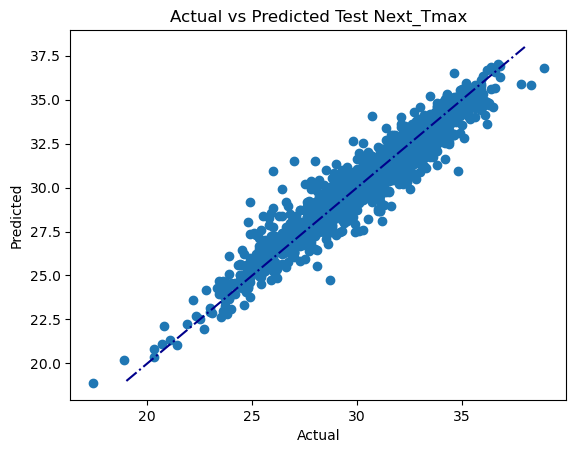

In [61]:
plt.scatter(y1_test, final_model_Max_test_pred)

plt.plot([19,38],[19,38],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test Next_Tmax')

Text(0.5, 1.0, 'Actual vs Predicted Test Next_Tmin')

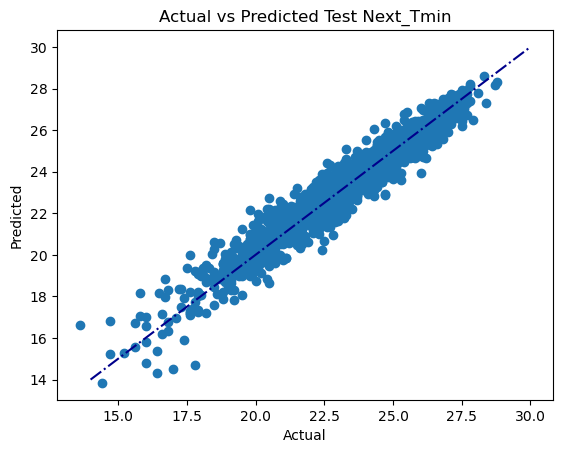

In [62]:

plt.scatter(y2_test, final_model_Min_test_pred)

plt.plot([14,30],[14,30],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test Next_Tmin')

### Saving Models

In [63]:
import pickle
with open('final_model_Max.pkl', 'wb') as file:

    pickle.dump(final_model_Max, file)
    
import pickle
with open('final_model_Min.pkl', 'wb') as file:

    pickle.dump(final_model_Min, file)    

##### from graph and r2 score we can confidently say that our model can Predict Next_Tmin with 92.9% accuracy and Next_Tmax with 91.7% accuracy